# Ciencia de datos (CC408) - Primavera 2024

## Trabajo Práctico 1 - Parte 2

Para los outlyers: Usar los puntos por fuera del boxplot, la MAD (fuera del +- 1.5 x MAD)

Se le puede aplicar el Log a la columna para predecir el precio y las reviews
    -Tratar de que sea lo más "normal" posible. 

O borramos la fila o imputamos con la mediana. 
    -A los que tengan 0 en reviewa, ponerlo en las otras tambien. 

### Reglas de formato y presentation
- El trabajo debe tener una extensión máxima de 8 páginas (no se permite Apéndice). Se espera una buena redacción en la resolución del práctico.
- El informe debe ser entregado en formato PDF, con los gráficos e imágenes en este mismo archivo.
- Entregar el código con los comandos utilizados, identificando claramente a qué inciso corresponde cada comando.

### Fecha de entrega:
Miércoles 2 de octubre a las 23:59 hs.

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 - Parte 2 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- al siguiente email: ispiousas@udesa.edu.ar
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte I: Limpieza de la base

#### Ejercicio 1
La base de datos provista contiene información sobre oferentes de Airbnb en la ciudad de Nueva York. Realicen una limpieza de la base.
- Tengan en cuenta si hay valores duplicados y eliminénlos.
- Eliminen las columnas que no tienen información de interés.
- (Opcional) Luego de leer el artículo __[Missing-data imputation](https://bookdown.org/mike/data_analysis/imputation-missing-data.html##imputation-missing-data)__ (__[Missing-data imputation articulo alternativo](http://www.stat.columbia.edu/~gelman/arm/missing.pdf)__), decidan qué hacer con los missing values e implementen su decision. Justifiquen su eleccion. Pueden usar informacion del paper mencionado o de otras fuentes (citenlas si las usan) para explicar los problemas que pueden surgir por su estrategia elegida.
- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.
- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.
- Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [1]:
# Resolver acá
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

airbnb = pd.read_csv('Base Airbnb NY.csv')
airbnb

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48900,19454344,Perfect ap in Manhattan! Walking to Central Park!,11670284,Val,Manhattan,Upper East Side,40.76811,-73.95194,Entire home/apt,150.0,3,10,2019-05-02,0.54,2,89
48901,36224876,Upper East Side Apt By The Water,46232598,Caitlin,Manhattan,Upper East Side,40.77001,-73.94915,Entire home/apt,150.0,1,1,2019-07-01,1.00,1,130
48902,21869051,Comfy Apt in NYC Brownstone,97243693,Joyce,Manhattan,Murray Hill,40.74812,-73.97663,Entire home/apt,150.0,3,57,2019-07-01,3.07,2,49
48903,3004563,The spot,15303460,Emma,Brooklyn,Prospect-Lefferts Gardens,40.65595,-73.95412,Private room,50.0,7,1,2019-06-08,0.94,1,125


- Tengan en cuenta si hay valores duplicados y eliminénlos.

In [2]:
#Para observar si tiene valores duplicados se utilizó la función duplicated y se contaron los mismos
duplicados = airbnb.duplicated().value_counts()
print(duplicados) #La base de datos tiene 10 duplicados

#Con la función drop_duplicates se eliminaron aquellas filas duplicadas en la base de datos. 
airbnb = airbnb.drop_duplicates()
print(airbnb)


False    48895
True        10
Name: count, dtype: int64
             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitch

- Eliminen las columnas que no tienen información de interés.


In [3]:
#En base al ""Diccionario de datos" se determinó que las columnas que no eran de interes son "id","host id", "name", 
# "host name" y "last review"

airbnb_interes= airbnb.drop(["id", "name", "host_name","host_id", "last_review"], axis=1)

airbnb_interes



,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,NaN,6,2


- Busqueda y tratamiento de los Missing Values


In [4]:
#Buscamos los datos faltantes con isna() y los sumamos por categoría
print(airbnb_interes.isna().sum()) #Hay datos faltantes en reviews per month y en precio

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                15
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [5]:
#Observamos si todos los NaN en "reviews per month" se deben a 0 en "number of reviews"
print(airbnb_interes[airbnb_interes["number_of_reviews"] == 0][["number_of_reviews", "reviews_per_month"]])

#Iteramos sobre la base, de forma tal que si hay un 0 en NoR, colocamos un 0 en RpM
for i in range(len(airbnb_interes)):
    if airbnb_interes["number_of_reviews"][i] == 0:
        airbnb_interes.loc[i, "reviews_per_month"] = 0

       number_of_reviews  reviews_per_month
2                      0                NaN
19                     0                NaN
26                     0                NaN
36                     0                NaN
38                     0                NaN
...                  ...                ...
48890                  0                NaN
48891                  0                NaN
48892                  0                NaN
48893                  0                NaN
48894                  0                NaN

[10052 rows x 2 columns]


In [6]:
#Corroboramos si se mantiene algún NaN
print(airbnb_interes.isna().sum()) 

neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                             15
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64


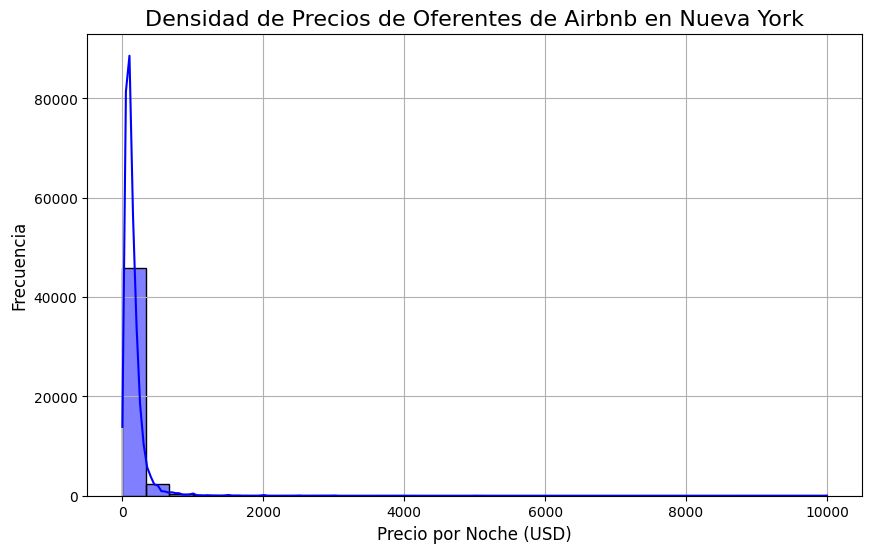

In [7]:
#Creo gráfico de barras para ver la densidad de los precios
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_interes["price"], bins=30, kde=True, color='blue')  #Utilizo la varibablre precio y agrego la linea de densidad

plt.title('Densidad de Precios de Oferentes de Airbnb en Nueva York', fontsize=16)
plt.xlabel('Precio por Noche (USD)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.grid(True)
plt.show() #Muestro el grafico


In [8]:
#Creo un nuevo dataframe para contener los valores de las medianas

airbnb_interes["median"]=airbnb_interes.groupby(["neighbourhood","room_type"])["price"].transform("median") #Agrupo según barrio y tipo de alojamiento
                                                                                                          # y luego aplico la funcion de mediana

airbnb_interes = airbnb_interes.fillna(value=-1)  #Lleno todos los NaN con el valor -1

for i in range(len(airbnb_interes)):              #Itero sobre los valores de precio en el dataframe original.
    if airbnb_interes["price"][i] == -1:          #Tomo el valor de indice de aquellas celdas con un -1 y lo reemplazo con el valor 
        airbnb_interes.loc[i, "price"] = airbnb_interes["median"][i] # del dataframe de medianas con el mismo indice.

print(airbnb_interes.isna().sum()) #Corroboro si quedan Missing Data. 

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
median                            0
dtype: int64


- Si hay observaciones con *outliers* o valores que no tienen sentido, tomen una decision. Expliquen las decisiones tomadas.


In [9]:
print(len(airbnb_interes[airbnb_interes["price"] == 0]))

airbnb_interes = airbnb_interes[airbnb_interes["price"] > 0]
airbnb_interes

11


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,median
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,0.21,6,365,50.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355,225.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3,0,0.00,1,365,70.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,4.64,1,194,150.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,0.10,1,0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9,60.0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36,55.0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27,139.5
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55.0,1,0,0.00,6,2,75.0


14860


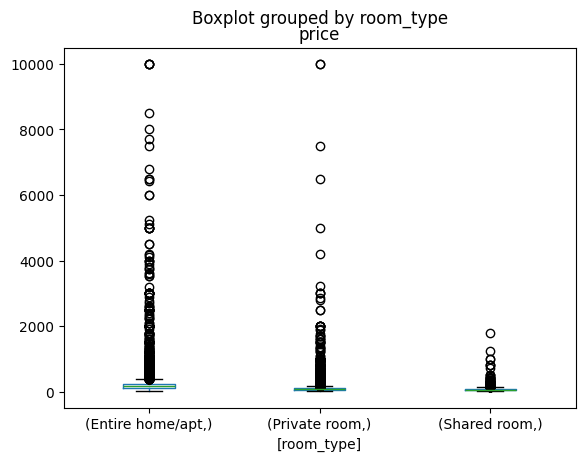

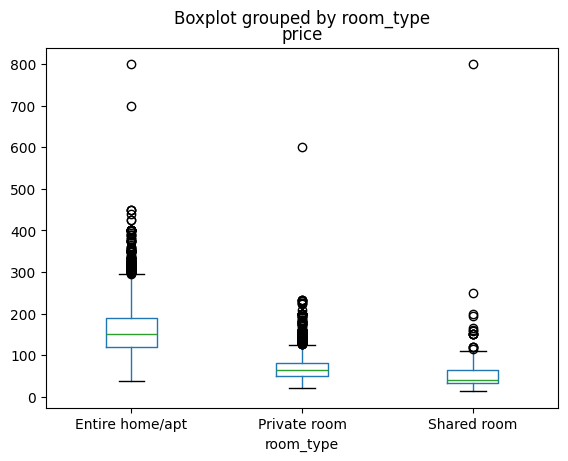

In [10]:
#Observo si hay outliers según un boxplot
airbnb_interes.boxplot(by =['room_type'], column =['price'], grid = False) 

#Calculo el MAD
airbnb_interes["Distancia Mediana"] = np.abs(airbnb_interes["price"] - airbnb_interes["median"] ) #Calculo la distancia absoluta a la mediana según el subgrupo

airbnb_interes["MAD"]=airbnb_interes.groupby(["neighbourhood","room_type"])["Distancia Mediana"].transform("median") #Creo la columna de MAD según 
                                                                                                                    #la mediana de las distancias


airbnb_limpio = airbnb_interes[airbnb_interes["price"] <= airbnb_interes["median"] + airbnb_interes["MAD"] * 1.5]


airbnb_limpio = airbnb_limpio[airbnb_limpio["price"] >= airbnb_limpio["median"] - airbnb_limpio["MAD"] * 1.5]


airbnb_limpio.boxplot(by ='room_type', column =['price'], grid = False) 

print(len(airbnb_interes) - len(airbnb_limpio))


In [11]:
airbnb_limpio = airbnb_limpio.drop(["median", "Distancia Mediana", "MAD"], axis=1)

In [13]:
airbnb_limpio

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129
6,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60.0,45,49,0.40,1,0
7,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,3.47,1,220
8,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79.0,2,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...
48889,Queens,Jamaica,40.69137,-73.80844,Private room,65.0,1,0,0.00,2,163
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27


In [14]:
#Noches minimas

print(len(airbnb_limpio))

airbnb_limpio2 = airbnb_limpio[airbnb_limpio["minimum_nights"] <= 30]
print(len(airbnb_limpio2))


#Noches Disponibles

airbnb_limpio2 = airbnb_limpio2[airbnb_limpio["availability_365"] > 0]


34024
33533


C:\Users\Teresa\AppData\Local\Temp\ipykernel_8452\4069496334.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  airbnb_limpio2 = airbnb_limpio2[airbnb_limpio["availability_365"] > 0]


- Transformen las variables **‘neighbourhood_group’** y **‘room_type’** a variables numericas.


In [15]:
#En primer lugar transformamos las variables en categoricas
airbnb_limpio2['room_type'] = airbnb_limpio2['room_type'].astype('category')
airbnb_limpio2['room_type_cod'] = airbnb_limpio2['room_type'].cat.codes  #luego creamos una nueva columna con el codigo asignado


airbnb_limpio2['neighbourhood_group'] = airbnb_limpio2['neighbourhood_group'].astype('category')
airbnb_limpio2['neighbourhood_group_cod'] = airbnb_limpio2['neighbourhood_group'].cat.codes

 Con la ayuda de los comandos <code>groupby</code> y <code>join</code> o <code>merge</code>, creen una columna que tenga la cantidad de oferentes por “Neighbourhood group”. Llamen a esa nueva columna <code>offer group</code>

In [16]:
#Creamos un dataframe aparte que contenga el tamaño de los agrupaciones por NeG
offer_counts = airbnb_limpio2.groupby(['neighbourhood_group']).size().reset_index(name='offer group')

offer_counts

# Unir la columna resultante al DataFrame original
airbnb_final = airbnb_limpio2.merge(offer_counts, on='neighbourhood_group',how='left')

airbnb_final

C:\Users\Teresa\AppData\Local\Temp\ipykernel_8452\2952265217.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  offer_counts = airbnb_limpio2.groupby(['neighbourhood_group']).size().reset_index(name='offer group')


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,room_type_cod,neighbourhood_group_cod,offer group
0,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,0.38,2,355,0,2,8817
1,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,0.59,1,129,0,2,8817
2,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79.0,2,430,3.47,1,220,1,2,8817
3,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150.0,1,160,1.33,4,188,0,2,8817
4,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135.0,5,53,0.43,1,6,0,2,8817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21016,Queens,Jamaica,40.69137,-73.80844,Private room,65.0,1,0,0.00,2,163,1,3,2914
21017,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70.0,2,0,0.00,2,9,1,1,8385
21018,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40.0,4,0,0.00,2,36,1,1,8385
21019,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115.0,10,0,0.00,1,27,0,2,8817


### Parte II: Graficos y visualizaciones

#### Ejercicio 2
Una vez hecha la limpieza, realicen una matriz de correlación con las siguientes variables:**‘neighbourhood group’, ‘latitude’, ‘longitude’, ‘room type’,‘price’, ‘minimum nights’, ‘number of reviews’, ‘reviews per month’,‘calculated host listings count’, ‘availability 365’.** Comenten los resultados. Utilicen alguno de los comandos disponibles en este link para graficar la matriz de correlacion.

*Nota:* consideren cómo es conveniente incluir las variables que originalmente eran categóricas para poder interpretar mejor la matriz de correlación.

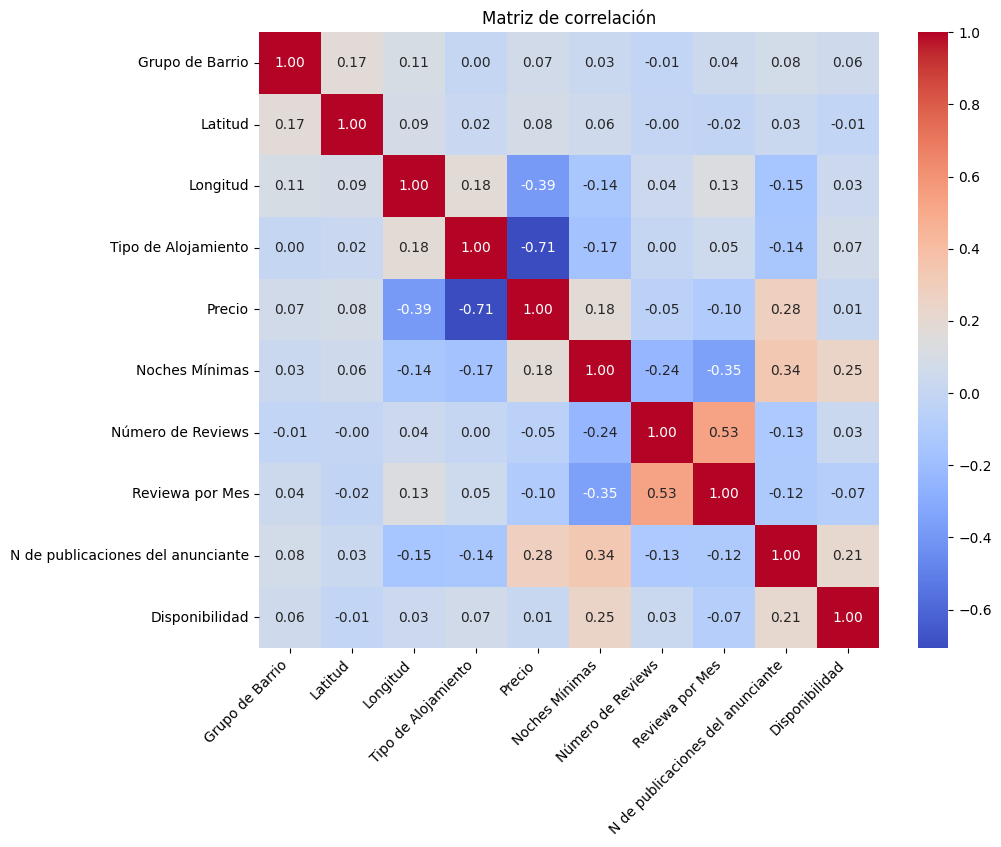

In [25]:
# Resolver acá
# Selecciono las columnas necesarias para la matriz de correlación
columnas = airbnb_final[['neighbourhood_group_cod', 'latitude', 'longitude', 'room_type_cod', 
                    'price', 'minimum_nights', 'number_of_reviews', 
                    'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

nombres = ["Grupo de Barrio", "Latitud", "Longitud", "Tipo de Alojamiento", "Precio", "Noches Mínimas", 
           "Número de Reviews", "Reviewa por Mes", "N de publicaciones del anunciante", "Disponibilidad"]

# Creamos la matriz de correlación
matriz= columnas.corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Matriz de correlación')
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5], nombres,rotation=45, ha='right')
plt.yticks([0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5], nombres)

plt.show()


#### Ejercicio 3
Respondan las siguientes preguntas: ¿Cuál es la proporción de oferentes por “Neighbourhood group”? ¿Y por tipo de habitación? Además, realicen gráficos para mostrar estas composiciones y comenten los resultados.

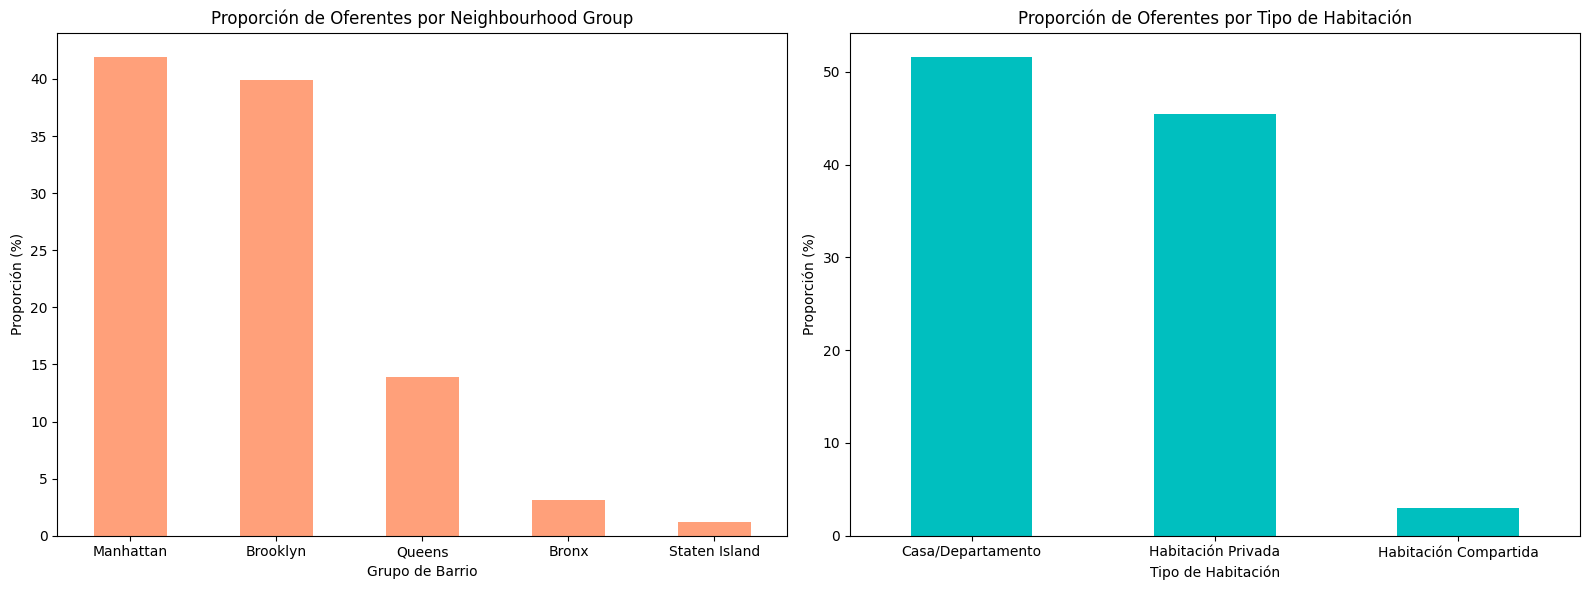

neighbourhood_group
Manhattan        41.943771
Brooklyn         39.888683
Queens           13.862328
Bronx             3.134960
Staten Island     1.170258
Name: proportion, dtype: float64
room_type
Entire home/apt    51.629323
Private room       45.416488
Shared room         2.954189
Name: proportion, dtype: float64


In [27]:
# Resolver acá

# Primero calculamos la proporción de oferentes por 'neighbourhood_group'
proporcion_NeG = airbnb_final['neighbourhood_group'].value_counts(normalize=True) * 100

# Calculamos la proporción de oferentes por 'room_type'
proporcion_RT = airbnb_final['room_type'].value_counts(normalize=True) * 100

# Creamos gráficos para mostrar las proporciones
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Gráfico de proporción por 'neighbourhood_group'
proporcion_NeG.plot(kind='bar', ax=ax[0], color='lightsalmon')
ax[0].set_title('Proporción de Oferentes por Neighbourhood Group')
ax[0].set_ylabel('Proporción (%)')
ax[0].set_xlabel("Grupo de Barrio")
ax[0].set_xticklabels(proporcion_NeG.index,rotation=0)

# Gráfico de proporción por 'room_type'
proporcion_RT.plot(kind='bar', ax=ax[1], color='c')

ax[1].set_title('Proporción de Oferentes por Tipo de Habitación')
ax[1].set_ylabel('Proporción (%)')
ax[1].set_xlabel('Tipo de Habitación')
ax[1].set_xticklabels(["Casa/Departamento", "Habitación Privada", "Habitación Compartida"],rotation=0)

plt.tight_layout()
plt.show()

# Mostramos las proporciones calculadas
print(proporcion_NeG)
print(proporcion_RT)


#### Ejercicio 4
Realicen un histograma de los precios de los alojamientos. Comenten el gráfico obtenido. Además, respondan las siguientes preguntas: ¿cuál es el precio mínimo, máximo y promedio? ¿Cuál es la media de precio por “Neighbourhood group” y por tipo de habitación? 

In [19]:
import math

airbnb_final["price_log"]= airbnb_final["price"].transform("log")

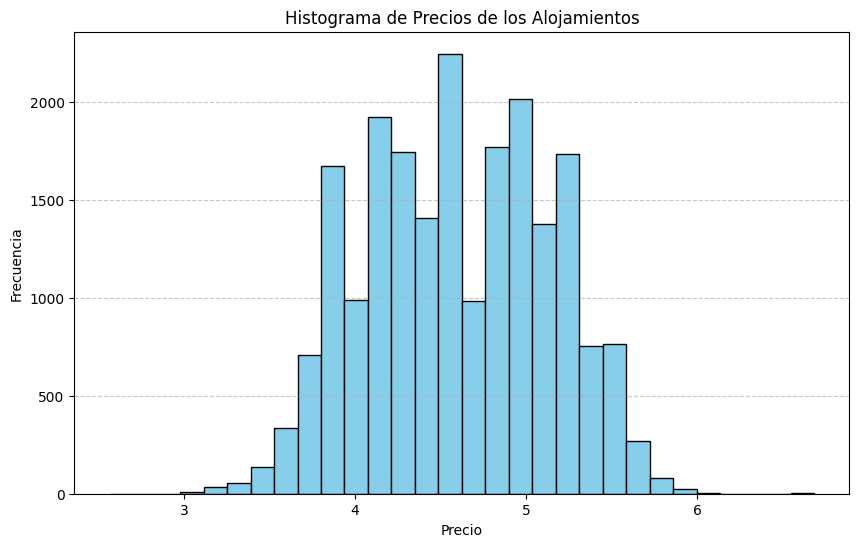

Precio mínimo: 13.0
Precio máximo: 800.0
Precio promedio: 114.71

Media de precio por Neighbourhood Group:
neighbourhood_group
Bronx             69.582701
Brooklyn          98.234764
Manhattan        147.126007
Queens            77.032601
Staten Island     81.841463
Name: price, dtype: float64

Media de precio por Tipo de Habitación:
room_type
Entire home/apt    158.689487
Private room        68.974285
Shared room         49.299517
Name: price, dtype: float64


C:\Users\Teresa\AppData\Local\Temp\ipykernel_8452\767249687.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_by_neighbourhood = airbnb_final.groupby('neighbourhood_group')['price'].mean()
C:\Users\Teresa\AppData\Local\Temp\ipykernel_8452\767249687.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_by_room_type = airbnb_final.groupby('room_type')['price'].mean()


In [20]:
# Resolver acá
# Creo un histograma de los precios de los alojamientos
plt.figure(figsize=(10, 6))
#plt.hist(airbnb_final["price"], bins=30, color='skyblue', edgecolor='black')
plt.hist(airbnb_final["price_log"], bins=30, color='skyblue', edgecolor='black')

plt.title('Histograma de Precios de los Alojamientos')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculo el precio mínimo, máximo y promedio
min_price = airbnb_final['price'].min()
max_price = airbnb_final['price'].max()
mean_price = airbnb_final['price'].mean()

# Calculo la media de precio por 'Neighbourhood group'
mean_price_by_neighbourhood = airbnb_final.groupby('neighbourhood_group')['price'].mean()

# Calculo la media de precio por 'room_type'
mean_price_by_room_type = airbnb_final.groupby('room_type')['price'].mean()

# Resultados
print(f"Precio mínimo: {min_price}")
print(f"Precio máximo: {max_price}")
print(f"Precio promedio: {mean_price:.2f}")

print("\nMedia de precio por Neighbourhood Group:")
print(mean_price_by_neighbourhood)

print("\nMedia de precio por Tipo de Habitación:")
print(mean_price_by_room_type)

#### Ejercicio 5
Realicen dos scatter plots con dos variables de interés en cada uno. Comenten.

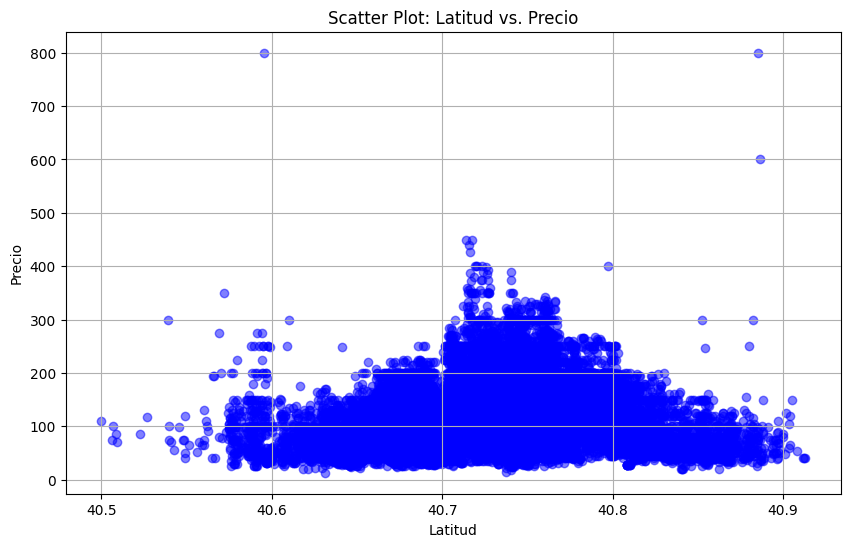

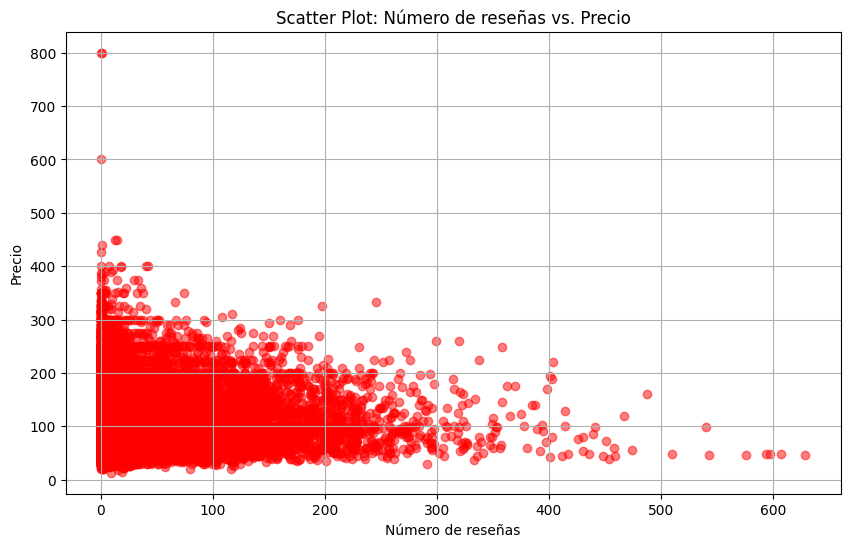

In [21]:
# Resolver acá
# Creo el primer scatter plot: Latitude vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(airbnb_final['latitude'], airbnb_final['price'], alpha=0.5, c='blue')
plt.title('Scatter Plot: Latitud vs. Precio')
plt.xlabel('Latitud')
plt.ylabel('Precio')
plt.grid(True)
plt.show()

# Creo el segundo scatter plot: Number of Reviews vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(airbnb_final['number_of_reviews'], airbnb_final['price'], alpha=0.5, c='red')
plt.title('Scatter Plot: Número de reseñas vs. Precio')
plt.xlabel('Número de reseñas')
plt.ylabel('Precio')
plt.grid(True)
plt.show()


#### Ejercicio 6
Utilicen el análisis de componentes principales para graficar las variables en dos dimensiones. Comenten los resultados obtenidos (qué porcentaje de la varianza se logra explicar con dos componentes, cómo son los *loadings*, si ven algún patrón en el gráfico).

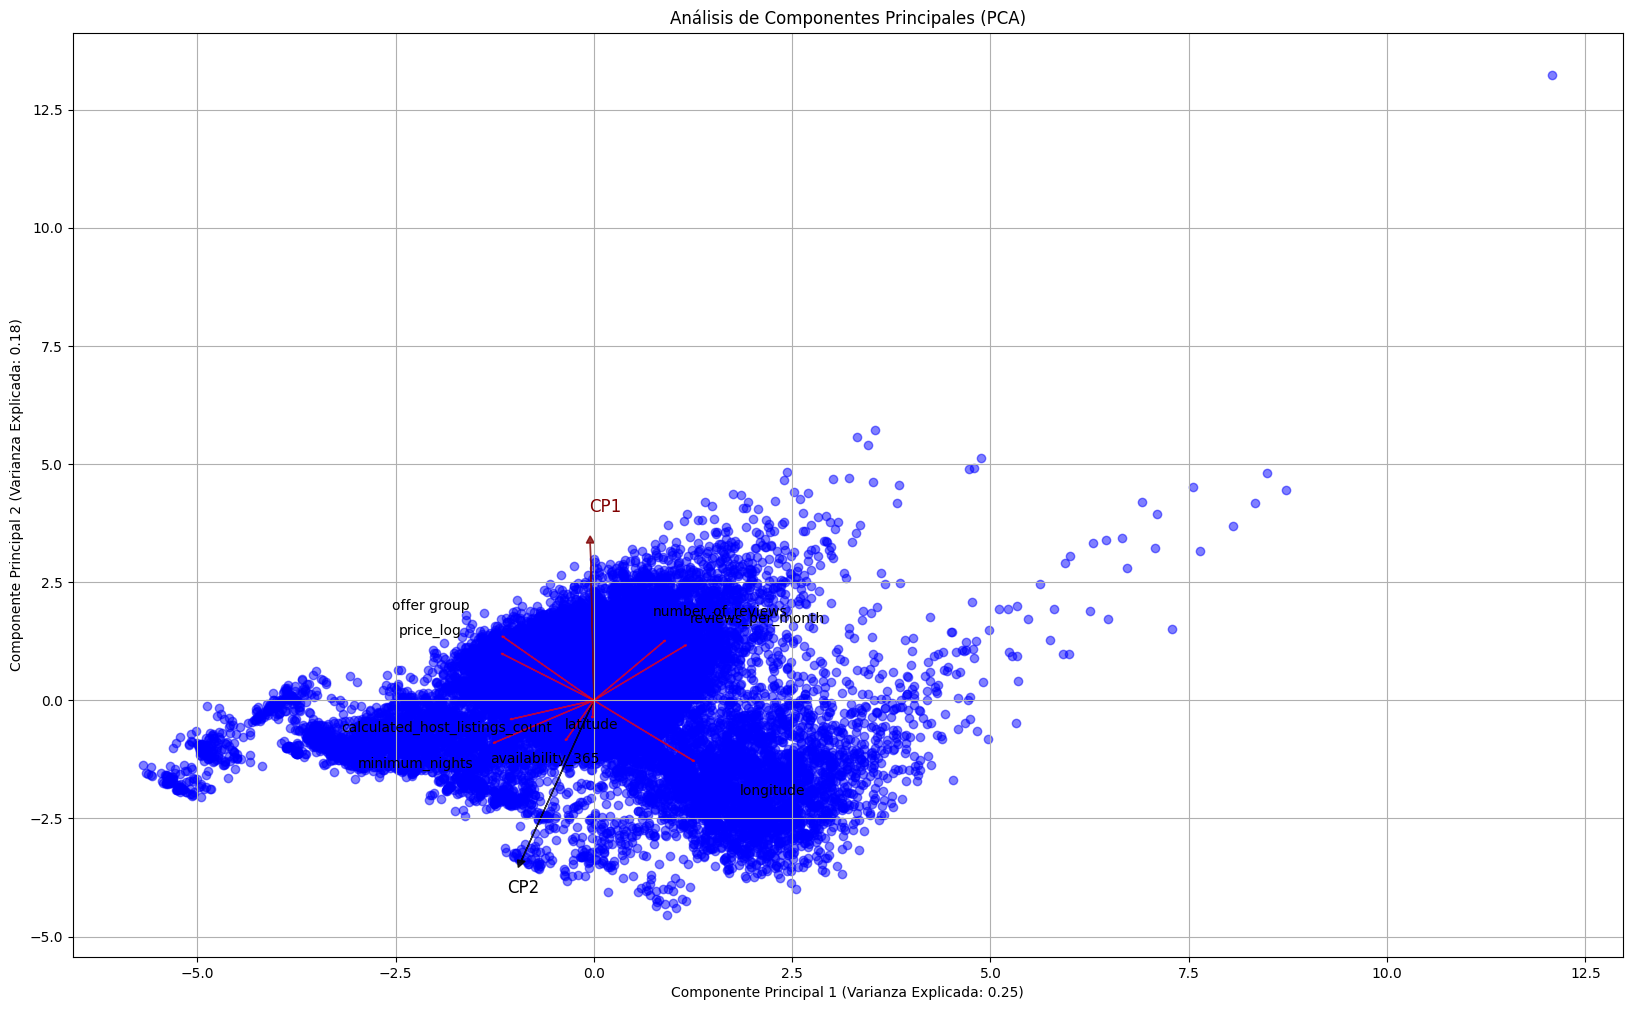

Porcentaje de varianza explicada por el primer componente: 0.25
Porcentaje de varianza explicada por el segundo componente: 0.18
Porcentaje de varianza total explicada por los dos componentes: 0.43

Loadings de cada variable en los componentes principales:
                                     PC1       PC2
latitude                       -0.005659 -0.114360
longitude                       0.416141 -0.423904
price_log                      -0.381704  0.325499
minimum_nights                 -0.415190 -0.296426
number_of_reviews               0.295013  0.416237
reviews_per_month               0.382111  0.384838
calculated_host_listings_count -0.343375 -0.131221
availability_365               -0.115532 -0.274625
offer group                    -0.380025  0.446562


In [55]:
# Resolver acá
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Selecciono las columnas numéricas para el análisis de PCA
columnas_num = ['latitude', 'longitude', 'price_log', 'minimum_nights', 'number_of_reviews', 
                   'reviews_per_month', 'calculated_host_listings_count', 'availability_365', "offer group"]

# Estandarizo los datos para que tengan media = 0 y varianza = 1
scaler = StandardScaler()
data_escalada = scaler.fit_transform(airbnb_final[columnas_num])

# Realizo Análisis de Componentes Principales (PCA) para reducir a 2 dimensiones
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(data_escalada)

# Creo un DataFrame con los componentes principales
data_pca = pd.DataFrame(data=componentes_principales, columns=['CP1', 'CP2'])

# Creo el gráfico de dispersión de los componentes principales
plt.figure(figsize=(20, 12))
plt.scatter(data_pca['CP1'], data_pca['CP2'], alpha=0.5, c='blue')
plt.title('Análisis de Componentes Principales (PCA)')
plt.xlabel(f'Componente Principal 1 (Varianza Explicada: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Componente Principal 2 (Varianza Explicada: {pca.explained_variance_ratio_[1]:.2f})')
plt.grid(True)

# Agregamos vectores que representen CP1 y CP2
scaling_factor = 8
# CP1 (flecha desde el origen)
plt.arrow(0, 0, pca.components_[0, 0] * scaling_factor, pca.components_[0, 1] * scaling_factor, 
          color='maroon', alpha=0.8, head_width=0.1, head_length=0.15, label='CP1')
plt.text(pca.components_[0, 0] * scaling_factor * 1.2, pca.components_[0, 1] * scaling_factor * 1.2, 
         'CP1', color='maroon', fontsize=12)

# CP2 (flecha desde el origen)
plt.arrow(0, 0, pca.components_[1, 0] * scaling_factor, pca.components_[1, 1] * scaling_factor, 
          color='black', alpha=0.8, head_width=0.1, head_length=0.15, label='CP2')
plt.text(pca.components_[1, 0] * scaling_factor * 1.2, pca.components_[1, 1] * scaling_factor * 1.2, 
         'CP2', color='black', fontsize=12)

loadings = pca.components_.T

# Escalamos los loadings para mejorar la visualización (ajustable)
scale_factor = 3  # Reduce la longitud de las flechas si es necesario
loadings_scaled = loadings * scale_factor

# Agregamos los vectores de los loadings al gráfico
for i, var in enumerate(columnas_num):
    plt.arrow(0, 0, loadings_scaled[i, 0], loadings_scaled[i, 1], 
              color='red', alpha=0.7, head_width=0.03, head_length=0.03)
    
    # Mueve el texto un poco más lejos de las flechas (aumentar el factor si es necesario)
    plt.text(loadings_scaled[i, 0] * 1.8, loadings_scaled[i, 1] * 1.5, var, 
             color='black', ha='center', va='center', fontsize=10)


plt.show()


# Porcentaje de varianza explicado por cada componente
explained_variance = pca.explained_variance_ratio_
print(f"Porcentaje de varianza explicada por el primer componente: {explained_variance[0]:.2f}")
print(f"Porcentaje de varianza explicada por el segundo componente: {explained_variance[1]:.2f}")
print(f"Porcentaje de varianza total explicada por los dos componentes: {explained_variance[0] + explained_variance[1]:.2f}")

# Loadings (pesos de cada variable en los componentes)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=columnas_num)
print("\nLoadings de cada variable en los componentes principales:")
print(loadings)

### Parte III: Predicción

El objetivo de esta parte del trabajo es intentar predecir los precios de los alojamientos.

#### Ejercicio 8
Partan la base en una base de prueba (test) y una de entrenamiento (train) utilizando el comando <code>train_test_split</code>. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (*random state instance*) debe ser 201. Establezca a price como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables ser´an las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [56]:
# Resolver acá
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Seleccionamos las variables dependientes e independientes
X = airbnb_final[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 
          'reviews_per_month', 'calculated_host_listings_count', 'availability_365', "offer group"]]

# Agregar la columna de unos (1) para la intersección en regresión
X['intercept'] = 1

# Variable dependiente (y)
y = airbnb_final["price_log"]

# Partimos la base en entrenamiento (70%) y prueba (30%) con una semilla de 201
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Tamaño de cada conjunto
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# Verificamos los subgrupos de X_train e y_train
print("\nVariables independientes (X_train):")
print(X_train.head())

print("\nVariable dependiente (y_train):")
print(y_train.head())

Tamaño del conjunto de entrenamiento: (14714, 9)
Tamaño del conjunto de prueba: (6307, 9)

Variables independientes (X_train):
       latitude  longitude  minimum_nights  number_of_reviews  \
8252   40.76503  -73.83039               1                 82   
8541   40.80387  -73.95853               3                103   
20738  40.84267  -73.93816               1                  0   
12775  40.71320  -73.94164               2                 75   
20428  40.76384  -73.98248               1                  6   

       reviews_per_month  calculated_host_listings_count  availability_365  \
8252                3.01                               2                52   
8541                3.93                               2                18   
20738               0.00                               1                 1   
12775               6.20                               2                15   
20428               6.00                               1               142   

       offer 

C:\Users\Teresa\AppData\Local\Temp\ipykernel_8452\2956818055.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['intercept'] = 1


#### Ejercicio 9
Implementen una regresión lineal y comenten los resultados obtenidos.

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     529.7
Date:                Wed, 02 Oct 2024   Prob (F-statistic):               0.00
Time:                        13:00:34   Log-Likelihood:                -10060.
No. Observations:               14714   AIC:                         2.014e+04
Df Residuals:                   14705   BIC:                         2.021e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
latitude    

C:\Users\Teresa\AppData\Local\Temp\ipykernel_8452\4261518747.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Línea Ideal (y = x)')


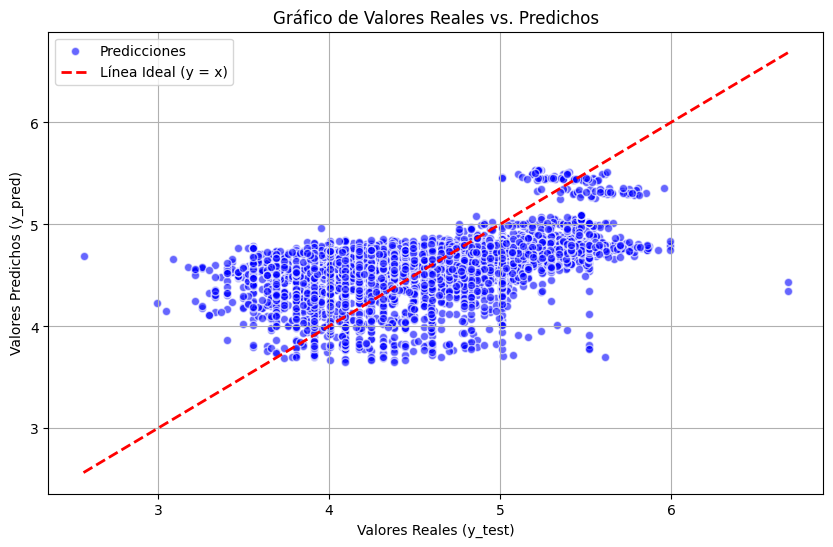

In [57]:
#resolver acá

# Agregamos la columna de unos (1) para la intersección en la regresión
X = sm.add_constant(X)  # statsmodels proporciona una función para agregar el intercepto

# Dividimos en conjunto de entrenamiento (70%) y prueba (30%) con una semilla de 201
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

# Ajustamos el modelo de regresión lineal con statsmodels
model = sm.OLS(y_train, X_train).fit()

# Resumen del modelo
print(model.summary())

# Predecimos el conjunto de prueba
y_pred = model.predict(X_test)

# Calculamos el Error Cuadrático Medio (MSE) y el R-cuadrado (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nError Cuadrático Medio (MSE): {mse:.2f}")
print(f"R-cuadrado (R^2): {r2:.2f}")

# Graficamos los valores reales vs. valores predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='w', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red', label='Línea Ideal (y = x)')
plt.xlabel('Valores Reales (y_test)')
plt.ylabel('Valores Predichos (y_pred)')
plt.title('Gráfico de Valores Reales vs. Predichos')
plt.legend()
plt.grid(True)
plt.show()
